## Estimating Betas in CAPM Model 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Input file

In [2]:
input_file = 'Beta.xls'
xlsfile = pd.ExcelFile(input_file)
SP500ExcessRet = xlsfile.parse('Data').iloc[2:,3].values.astype(np.float64)
OracleExcessRet = xlsfile.parse('Data').iloc[2:,5].values.astype(np.float64)

Run linear regression

In [3]:
X = SP500ExcessRet
X = sm.add_constant(X)
results = sm.OLS(OracleExcessRet, X).fit()
beta = results.params

In [4]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     17.15
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           0.000113
Time:                        12:35:24   Log-Likelihood:                 46.924
No. Observations:                  60   AIC:                            -89.85
Df Residuals:                      58   BIC:                            -85.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0051      0.015     -0.348      0.7

In [5]:
beta[0]

-0.005062781395675436

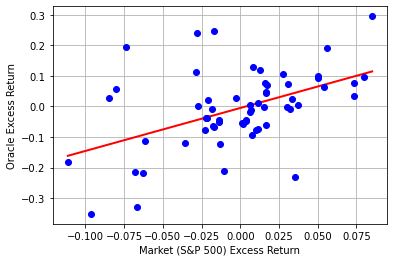

In [6]:
plt.xlabel('Market (S&P 500) Excess Return')
plt.ylabel('Oracle Excess Return')
plt.plot([min(SP500ExcessRet), max(SP500ExcessRet)], [beta[0] + beta[1] * min(SP500ExcessRet), beta[0]+beta[1]*max(SP500ExcessRet)], color='r', linewidth=2.0);
plt.plot(SP500ExcessRet, OracleExcessRet, 'bo')
plt.grid()

In [7]:
results.params

array([-0.00506278,  1.40556642])

In [8]:
results.conf_int()

array([[-0.03417932,  0.02405376],
       [ 0.72623617,  2.08489667]])

In [9]:
results.pvalues

array([7.29056398e-01, 1.13313580e-04])